## Importok

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")

###Fájlok beolvasása

In [2]:
boltok = pd.read_excel("Boltok.xlsx") #Boltok
cikk = pd.read_excel("Cikk.xlsx") #Cikkek
cikkcsop = pd.read_excel("Cikk_cikkcsop.xlsx") #Cikk_cikkcsoportok
cikkcsoportok = pd.read_excel("Cikkcsoportok.xlsx") #Cikkcsoportok
geo = pd.read_excel("Geo adatok.xlsx") #Geomadatok
keszlet = pd.read_excel("keszlet.xlsx") #Keszlet
gyarto = pd.read_excel("Gyartok.xlsx") #Gyartok
forgalom = pd.read_excel("forgalom.xlsx") #Forgalom

#Ismerkedünk a Python-nal, egy-két alap lekérdezés és kiiratás 

### Hány darab bolt van?

In [3]:
len(boltok)

33

In [4]:
boltok

,sek_id,sek_desc,sek_cim
0,10200,Cég 0. Raktár1,5600
1,10300,Cég 0. Raktár2,5600
2,30103,Cég I. Bolt1,5500
3,30104,Cég I. Bolt2,5510
4,30105,Cég I. Bolt3,5516
5,30106,Cég I. Bolt4,5520
6,30108,Cég I. Bolt5,5525
7,30109,Cég I. Bolt6,5525
8,30110,Cég I. Bolt7,5526
9,30111,Cég I. Bolt8,5510


In [5]:
cikk.head(10)

,cik_id,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id
0,1000001,Termék 0000001,304205600,DB,50136,A
1,1000002,Termék 0000002,303781200,DB,50136,A
2,1000003,Termék 0000003,1517109000,DB,50260,A
3,1000004,Termék 0000004,403905300,DB,50258,A
4,1000008,Termék 0000005,2202901010,DB,50232,A
5,1000009,Termék 0000006,2202901000,DB,50232,A
6,1000010,Termék 0000007,2202901000,DB,50232,A
7,1000011,Termék 0000008,406,DB,53218,A
8,1000013,Termék 0000009,406,DB,53218,A
9,1000014,Termék 0000010,401301100,DB,53218,A


In [6]:
cikkcsop.head(10)

,ccsop_id4,cik_id
0,3303,1000001
1,3303,1000002
2,3206,1000003
3,3204,1000004
4,219,1000005
5,219,1000006
6,3204,1000007
7,3508,1000008
8,3203,1000009
9,3203,1000010


In [7]:
cikkcsoportok.tail(10)
#len(cikkcsoportok)

,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_id4,ccsop_desc4
299,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8402,"ALSÓRUHÁZAT, FEHÉRNEM?"
300,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8403,"ZOKNI ,HARISNYA"
301,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,84,RUHÁZATI TERMÉKEK,8406,EGYÉB RUHÁZATI KIEGÉSZÍT?K
302,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,85,"SPORT, JÁTÉK, SZABADIDŐ",8501,"SPORT, JÁTÉK, SZABADIDŐ"
303,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8601,"VIRÁGMAGOK, VIRÁGOK"
304,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8602,VIRÁGFÖLD
305,1,Alap cikkcsoport,80,NON FOOD TERMÉKEK,86,KERTÉSZETI TERMÉKEK,8603,KERTÉSZETI CIKKEK
306,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,91,SZOLGÁLTATÁSOK,9101,SZOLGÁLTATÁSOK
307,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9201,TAPADÓ GÖNYGYÖLEG
308,1,Alap cikkcsoport,90,SZOLGÁLTATÁSOK,92,GÖNGYÖLEG,9202,NEM TAPADÓ GÖNYGYÖLEG


In [8]:
geo[(geo["geo_orszag"] == "Magyarország".decode('utf-8')) &(geo["geo_megye"] == "Bekes megye".decode('utf-8'))].head(10)

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
1590,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1591,5501,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1592,5502,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1593,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
1594,5515,NaN,Ecsegfalva,Bekes megye,Dél-Alföld,Magyarország
1595,5516,NaN,Körösladány,Bekes megye,Dél-Alföld,Magyarország
1596,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
1597,5521,NaN,Töltse Ki,Bekes megye,Dél-Alföld,Magyarország
1598,5525,NaN,Füzesgyarmat,Bekes megye,Dél-Alföld,Magyarország
1599,5526,NaN,Kertészsziget,Bekes megye,Dél-Alföld,Magyarország


In [10]:
keszlet[100:200]

,cik,tph,datum,mennyiseg
100,1000503,30302,2016-02-02,41.000
101,1000505,30302,2016-02-02,4.000
102,1000514,30302,2016-02-02,1.000
103,1000518,30302,2016-02-02,-2.000
104,1000523,30302,2016-02-02,-4.000
105,1000530,30302,2016-02-02,1.000
106,1000541,30302,2016-02-02,7.000
107,1000545,30302,2016-02-02,0.000
108,1000547,30302,2016-02-02,2.074
109,1000549,30302,2016-02-02,1.000


##Kerekítés 100-asra

In [11]:
keszlet.mennyiseg = keszlet.mennyiseg.apply(lambda x: np.round(x,decimals=-2))
keszlet.head(20)
#np.round(keszlet.mennyiseg, decimals=-2)

,cik,tph,datum,mennyiseg
0,1000002,30302,2016-02-02,0
1,1000004,30302,2016-02-02,0
2,1000008,30302,2016-02-02,0
3,1000011,30302,2016-02-02,0
4,1000013,30302,2016-02-02,0
5,1000015,30302,2016-02-02,0
6,1000019,30302,2016-02-02,0
7,1000020,30302,2016-02-02,0
8,1000022,30302,2016-02-02,0
9,1000024,30302,2016-02-02,0


In [9]:
keszlet2 = keszlet
keszlet2 = keszlet2[keszlet2["mennyiseg"] != 0]
keszlet2.head(10)

,cik,tph,datum,mennyiseg
0,1000002,30302,2016-02-02,14.00
2,1000008,30302,2016-02-02,4.00
3,1000011,30302,2016-02-02,7.00
4,1000013,30302,2016-02-02,12.00
6,1000019,30302,2016-02-02,1.00
7,1000020,30302,2016-02-02,13.00
9,1000024,30302,2016-02-02,5.00
11,1000035,30302,2016-02-02,-6.70
12,1000040,30302,2016-02-02,-0.35
13,1000044,30302,2016-02-02,5.02


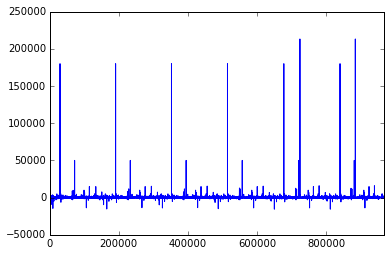

In [10]:
keszlet2.mennyiseg.plot()

In [12]:
keszlet_reszlet = keszlet[(keszlet["tph"] == 30313) & (keszlet["datum"] == "2016-02-02") & (keszlet["cik"] < 1000022)]

In [13]:
keszlet_reszlet
result = pd.merge(keszlet, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
result_2 = pd.merge(result,cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result_2.head(10)

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30302,2016-02-02,14,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,30313,2016-02-02,21,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000002,30316,2016-02-02,12,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000002,30318,2016-02-02,44,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000002,30319,2016-02-02,20,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1000002,30323,2016-02-02,11,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1000002,30324,2016-02-02,26,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1000002,30325,2016-02-02,8,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1000002,30327,2016-02-02,30,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1000002,30329,2016-02-02,19,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


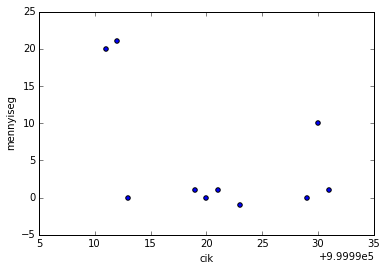

In [14]:
keszlet_reszlet.plot(kind='scatter',x="cik",y="mennyiseg")

#Feladatok

## Vegyük ki a geo adathalmazból a nem magyarországi adatokat!

In [15]:
geo = geo[geo["geo_orszag"] == "Magyarország".decode('utf-8')]
geo.head(10)

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,0,NaN,Töltse Ki,Nem besorolt,Nem besorolt,Magyarország
3,1000,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
4,1001,NaN,Budapest,Budapest,Közép-Magyarország,Magyarország
5,1010,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
6,1011,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
7,1012,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
8,1013,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
9,1014,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
10,1015,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország
11,1016,1. ker.,Budapest,Budapest,Közép-Magyarország,Magyarország


In [16]:
geo.tail(10)

,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
3260,7973,NaN,Bürüs,Baranya megye,Dél-Dunántúl,Magyarország
3261,7981,NaN,Merenye,Baranya megye,Dél-Dunántúl,Magyarország
3262,7985,NaN,Kisdobsza,Baranya megye,Dél-Dunántúl,Magyarország
3263,8130,NaN,Enying Kabóka puszta,Fejer megye,Közép-Dunántúl,Magyarország
3264,8600,NaN,Siófok-Kiliti,Somogy megye,Dél-Dunántúl,Magyarország
3265,8681,NaN,Visz,Somogy megye,Dél-Dunántúl,Magyarország
3266,8731,NaN,Tikos,Somogy megye,Dél-Dunántúl,Magyarország
3267,8858,NaN,Porrogszentkirály,Somogy megye,Dél-Dunántúl,Magyarország
3270,15,NaN,Bialystok,Magyarország,Külföld,Magyarország
3274,7967,NaN,Markóc,Baranya megye,Dél-Dunántúl,Magyarország


##Nézzük meg, milyen területű készleteink vannak (hol vannak a boltok)!
###(félek hogy csak Békés megyeiek lesznek :( ) - igen


In [17]:
res=pd.merge(boltok, keszlet, left_on='sek_id', right_on='tph', how='inner')         
res2=pd.merge(res, geo, left_on='sek_cim', right_on='geo_id', how='inner')
res2.head(20)

,sek_id,sek_desc,sek_cim,cik,tph,datum,mennyiseg,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,30103,Cég I. Bolt1,5500,1000002,30103,2016-02-02,21.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
1,30103,Cég I. Bolt1,5500,1000004,30103,2016-02-02,5.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,1000008,30103,2016-02-02,7.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30103,Cég I. Bolt1,5500,1000011,30103,2016-02-02,0.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30103,Cég I. Bolt1,5500,1000013,30103,2016-02-02,-1.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
5,30103,Cég I. Bolt1,5500,1000019,30103,2016-02-02,5.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
6,30103,Cég I. Bolt1,5500,1000020,30103,2016-02-02,32.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
7,30103,Cég I. Bolt1,5500,1000022,30103,2016-02-02,7.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
8,30103,Cég I. Bolt1,5500,1000024,30103,2016-02-02,4.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
9,30103,Cég I. Bolt1,5500,1000026,30103,2016-02-02,5.000,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország


In [18]:
set(res2["geo_megye"].tolist())

{u'Bekes megye'}

## Csináljunk egy táblázatot, amelyben megnézzük hogy mely terméket ki gyártotta!

In [19]:
gyarto.head()

,gyarto_id,gyarto_desc
0,50146,Gyártó 1
1,52600,Gyártó 2
2,52612,Gyártó 3
3,53022,Gyártó 4
4,53050,Gyártó 5


In [20]:
result = pd.merge(cikk, cikkcsop, left_on='cik_id', right_on='cik_id', how='inner')
result.drop('cjel_id', axis=1, inplace=True)
result.drop('cik_me_id', axis=1, inplace=True)
result.drop('vtsz_id', axis=1, inplace=True)
result.head(10)

,cik_id,cik_desc2,cik_gyart,ccsop_id4
0,1000001,Termék 0000001,50136,3303
1,1000002,Termék 0000002,50136,3303
2,1000003,Termék 0000003,50260,3206
3,1000004,Termék 0000004,50258,3204
4,1000008,Termék 0000005,50232,3508
5,1000009,Termék 0000006,50232,3203
6,1000010,Termék 0000007,50232,3203
7,1000011,Termék 0000008,53218,3103
8,1000013,Termék 0000009,53218,3103
9,1000014,Termék 0000010,53218,3211


In [21]:
result2 = pd.merge(result, cikkcsoportok, left_on='ccsop_id4', right_on='ccsop_id4', how='inner')
result2.drop('ccsop_id4', axis=1, inplace=True)
result2.drop('ccsop_id', axis=1, inplace=True)
result2.drop('ccsop_id2', axis=1, inplace=True)
result2.drop('ccsop_id3', axis=1, inplace=True)
result2.head(10)

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000319,Termék 0000269,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000584,Termék 0000468,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000586,Termék 0000470,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1001115,Termék 0000872,52490,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1015395,Termék 0010272,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1015397,Termék 0010273,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1015398,Termék 0010274,50296,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [22]:
result3 = pd.merge(result2, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result3.drop('gyarto_id',axis=1, inplace=True)
result3.head(10)

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4,gyarto_desc
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
2,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
3,1015407,Termék 0010280,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
4,1015408,Termék 0010281,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
5,1015412,Termék 0010284,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
6,1015413,Termék 0010285,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
7,1001141,Termék 0000898,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
8,1001143,Termék 0000900,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
9,1016785,Termék 0011471,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93


In [23]:
result3["gyarto_desc"].tolist()[0] == "Gyártó 93".decode("utf-8")

True

In [24]:
a = list(set(result3["gyarto_desc"].tolist()))
a[0] == "Gyártó 818".decode("utf-8")

True

## Listázd ki milyen termékeink vannak (ccsop_desc4)! Mindegyik csak egyszer szerepeljen!

In [25]:
csop=list(set(cikkcsoportok["ccsop_desc4"].tolist()))
ccsop4 = pd.DataFrame(csop)
ccsop4.columns = ["Termék"]
ccsop4

,Termék
0,KIS KISZERELÉS?
1,"PEZSG?TABLETTÁK, ITALPOROK"
2,CSIRKE CSOMAGOLT
3,NAPOZÓSZEREK
4,SÓ ZACSKÓS
5,PÁLINKÁK
6,"LEKVÁROK , DZSEMEK"
7,ZÖLDSÉG EGYÉB
8,SERTÉS CSOMAGOLT
9,"IZZÓK, FÉNYCSÖVEK"


#>>>>>>>>>>>>>>>>>Diagram feladatok:<<<<<<<<<<<<<<<<<<<<<<<

## Készítsünk diagramot, hogy egy adott napon, adott boltnak milyen termékből mennyi készlete volt!
### hint: előtte ugye össze kell mergelni a termékeket a készlettel, és akkor a kódsorban megadott feltétel alapján kell megcsinálni az eloszlást :) Remélhetőleg  bplot vagy pyplot vagy seaborn-nel meg tudjuk szépen csinálni, mert először nem akaródzott

In [26]:
elso = keszlet2[(keszlet2["tph"]==30302) & (keszlet2["datum"]=="2016-02-02")]
elso.index = elso["cik"]
len(elso)

5139

In [27]:
elso.drop("cik",axis=1, inplace=True)
elso.drop("tph",axis=1, inplace=True)
elso.drop("datum",axis=1, inplace=True)
print()

C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

()


In [28]:
#elso.drop("datum",axis=1, inplace=True)
#elso = elso[(elso["mennyiseg"]<1) & (elso["mennyiseg"]>-1) & (elso["mennyiseg"]!=0)]
elso = elso[(elso["mennyiseg"]>100)]
elso.head(10)

,mennyiseg
cik,
1001063,344.000
1002138,115.000
1002279,216.035
1002590,192.000
1002592,145.000
1002743,121.000
1002826,166.000
1002828,184.000
1002950,217.000


## A 30302-es telephelyen 200-nál nagyobb mennyiségű készletek diagramja:

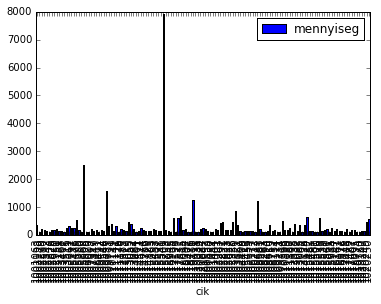

In [29]:
elso.plot(kind='bar')

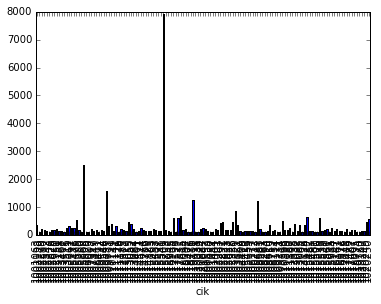

In [30]:
elso = elso[elso["mennyiseg"]>100]
elso.mennyiseg.plot(kind='bar')

## Készítsünk diagramot, hogy egy adott boltnak hogyan változik a készlete az adott egy hét alatt!

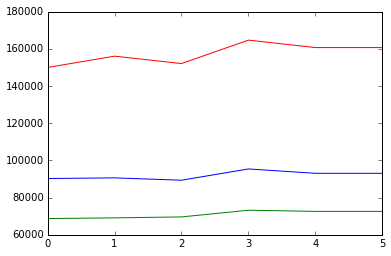

In [31]:
keszlet
masodik = keszlet2[(keszlet2["tph"]==30302)]
harmadik = keszlet2[(keszlet2["tph"]==30313)]
negyedik = keszlet2[(keszlet2["tph"]==30352)]
plt.plot(masodik.groupby(["tph","datum"])["mennyiseg"].sum()) #kék
plt.plot(harmadik.groupby(["tph","datum"])["mennyiseg"].sum()) #zöld
plt.plot(negyedik.groupby(["tph","datum"])["mennyiseg"].sum()) # piros
plt.show()

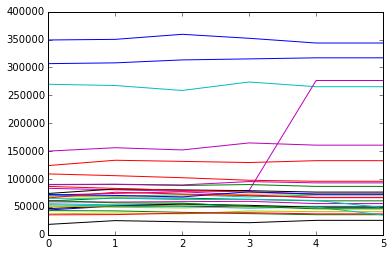

In [32]:
bolt = boltok.sek_id.tolist()
for i in bolt:
    plt.plot(keszlet2[(keszlet2["tph"])==i].groupby(["tph","datum"])["mennyiseg"].sum())
    

## Két bolt összehasonlítása

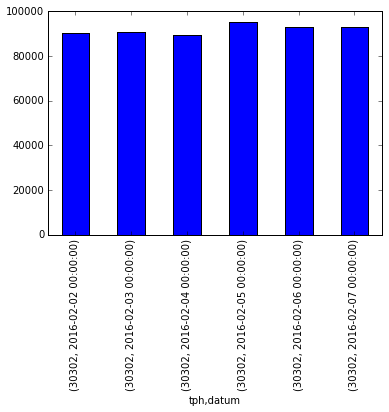

In [33]:
#masodik = masodik.groupby("datum")
#masodik = masodik.groupby(["tph","datum"])
#massum = masodik["mennyiseg"].sum()
masodik.groupby(["tph","datum"])["mennyiseg"].sum().plot(kind='bar')

In [34]:
masodik2 = keszlet2.groupby(["tph","datum"])
masodiksum = masodik2["mennyiseg"].sum()
masodiksum

tph    datum     
30103  2016-02-02    124068.4851
       2016-02-03    133591.1621
       2016-02-04    131581.2341
       2016-02-05    129510.1944
       2016-02-06    132846.6194
       2016-02-07    132846.6194
30104  2016-02-02    269769.8616
       2016-02-03    267518.5198
       2016-02-04    258656.5755
       2016-02-05    273846.4725
       2016-02-06    265375.9479
       2016-02-07    265375.9479
30105  2016-02-02     83291.3001
       2016-02-03     80681.1551
       2016-02-04     78002.2201
       2016-02-05     79531.8308
       2016-02-06    276516.3140
       2016-02-07    276516.3140
30106  2016-02-02     50050.6170
       2016-02-03     53143.4970
       2016-02-04     52215.0310
       2016-02-05     50499.0750
       2016-02-06     50685.7450
       2016-02-07     50685.7450
30108  2016-02-02     74061.7536
       2016-02-03     82045.6637
       2016-02-04     80450.1457
       2016-02-05     79036.3095
       2016-02-06     76512.7945
       2016-02-07     765

## Diagramm: Hány terméket gyártanak az egyes gyártók? +

In [37]:
#import collections
#cikkcnt=collections.Counter(cikk["cik_gyart"])
#cikkcnt.values()
#cikkcnt.keys()
result
result2 = pd.merge(result, gyarto, left_on='cik_gyart', right_on='gyarto_id', how='inner')
result2.groupby("gyarto_desc").cik_id.nunique()

gyarto_desc
Gyártó 1        1
Gyártó 101      4
Gyártó 102     68
Gyártó 103     13
Gyártó 104      9
Gyártó 106      4
Gyártó 107     30
Gyártó 108     91
Gyártó 111     55
Gyártó 112     67
Gyártó 113     58
Gyártó 116     14
Gyártó 117     50
Gyártó 118      6
Gyártó 119    110
Gyártó 120     84
Gyártó 121      1
Gyártó 122     35
Gyártó 123     21
Gyártó 124     25
Gyártó 125     22
Gyártó 127     21
Gyártó 128      5
Gyártó 129    101
Gyártó 130     84
Gyártó 131     17
Gyártó 132      2
Gyártó 135     19
Gyártó 137     14
Gyártó 138     88
             ... 
Gyártó 791      4
Gyártó 793     15
Gyártó 794      2
Gyártó 795     20
Gyártó 796      5
Gyártó 797     10
Gyártó 799      9
Gyártó 806      1
Gyártó 81      26
Gyártó 816     67
Gyártó 817     76
Gyártó 818     14
Gyártó 833      2
Gyártó 84       5
Gyártó 85      68
Gyártó 852      2
Gyártó 856     56
Gyártó 86       9
Gyártó 865      3
Gyártó 866      2
Gyártó 87      17
Gyártó 876      7
Gyártó 879      1
Gyártó 89      9

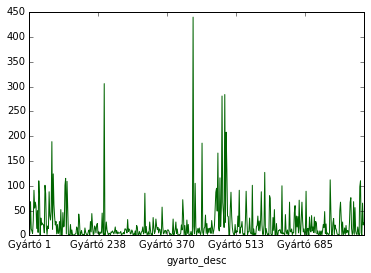

In [44]:
result2.groupby("gyarto_desc").cik_id.nunique().plot(color='DarkGreen')

## Diagramm: Hány gyártó gyárt terméket egy adott boltnak? +

In [53]:
tmp3 = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp4=tmp3[tmp3["tph"]==30302]
tmp4
len(set(tmp4["cik_gyart"].tolist()))

344

In [54]:
tmp3.drop("cik",axis=1,inplace=True)
tmp3.drop("datum",axis=1,inplace=True)
tmp3.drop("cik_id",axis=1,inplace=True)
tmp3.drop("cik_desc2",axis=1,inplace=True)
tmp3.drop("vtsz_id",axis=1,inplace=True)
tmp3.drop("cik_me_id",axis=1,inplace=True)
tmp3.drop("cjel_id",axis=1,inplace=True)
tmp3.head(100)

,tph,mennyiseg,cik_gyart
0,30302,14,50136
1,30313,21,50136
2,30316,12,50136
3,30318,44,50136
4,30319,20,50136
5,30323,11,50136
6,30324,26,50136
7,30325,8,50136
8,30327,30,50136
9,30329,19,50136


In [55]:
tmp3.groupby(["tph","cik_gyart"]).count().head(10)

mennyiseg
tph   cik_gyart           
30103 0               4805
      50004            870
      50006             12
      50008            120
      50016              6
      50020              6
      50022            408
      50028            392
      50030              6
      50032             60

In [56]:
bolt_gyarto=tmp3.groupby(["tph"]).cik_gyart.nunique()
pd.DataFrame(bolt_gyarto).head(10)

,cik_gyart
tph,
30103,365
30104,421
30105,340
30106,320
30108,325
30109,307
30110,358
30111,365
30113,320


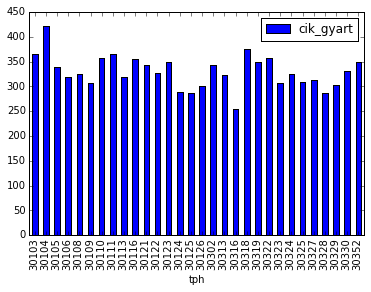

In [57]:
pd.DataFrame(bolt_gyarto).plot(kind='bar')

## -Diagramm: Adott termékcsoport mennyisége egy adott boltban! 

In [58]:
tmp5 = pd.merge(keszlet, cikk, left_on='cik', right_on='cik_id', how='inner')
tmp6 = pd.merge(tmp5, cikkcsop, left_on='cik', right_on='cik_id', how='inner')
tmp7=tmp6[(tmp6["tph"]==30302) & (tmp6["ccsop_id4"]==3303)]
len(tmp7)
tmp6.head(10)

,cik,tph,datum,mennyiseg,cik_id_x,cik_desc2,vtsz_id,cik_me_id,cik_gyart,cjel_id,ccsop_id4,cik_id_y
0,1000002,30302,2016-02-02,14,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
1,1000002,30313,2016-02-02,21,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
2,1000002,30316,2016-02-02,12,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
3,1000002,30318,2016-02-02,44,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
4,1000002,30319,2016-02-02,20,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
5,1000002,30323,2016-02-02,11,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
6,1000002,30324,2016-02-02,26,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
7,1000002,30325,2016-02-02,8,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
8,1000002,30327,2016-02-02,30,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002
9,1000002,30329,2016-02-02,19,1000002,Termék 0000002,303781200,DB,50136,A,3303,1000002


In [59]:
tmp6.drop("cik_id_x",axis=1,inplace=True)
tmp6.drop("cik_id_y",axis=1,inplace=True)
tmp6.drop("cjel_id",axis=1,inplace=True)
tmp6.drop("cik_me_id",axis=1,inplace=True)
tmp6.drop("vtsz_id",axis=1,inplace=True)
tmp6.drop("cik",axis=1,inplace=True)
#tmp6.drop("cik_gyart",axis=1,inplace=True)
tmp6.drop("cik_desc2",axis=1,inplace=True)
tmp6.head(10)

,tph,datum,mennyiseg,cik_gyart,ccsop_id4
0,30302,2016-02-02,14,50136,3303
1,30313,2016-02-02,21,50136,3303
2,30316,2016-02-02,12,50136,3303
3,30318,2016-02-02,44,50136,3303
4,30319,2016-02-02,20,50136,3303
5,30323,2016-02-02,11,50136,3303
6,30324,2016-02-02,26,50136,3303
7,30325,2016-02-02,8,50136,3303
8,30327,2016-02-02,30,50136,3303
9,30329,2016-02-02,19,50136,3303


In [60]:
len(tmp6[(tmp6["ccsop_id4"]==18) & (tmp6["tph"]==30103)])

36

## Egyes boltokban, napi lebontásban mennyi termék volt a ccsop_id4 csoport tagjaiból!

In [64]:
tmp6.groupby(["tph","datum","ccsop_id4"]).sum().head(500)

mennyiseg  cik_gyart
tph   datum      ccsop_id4                      
30103 2016-02-02 0            13.0000     209008
                 18            0.0000          0
                 111          -1.4000     101196
                 112        1153.5211    1046428
                 114         -18.8250     152084
                 115         -18.0650          0
                 122          40.7950     681806
                 124           7.3500      52436
                 141          15.8400      54806
                 142         260.6130     708448
                 143          -6.3420     159936
                 144          37.0410     219224
                 145         -28.6000      54806
                 152           2.4250     488528
                 154           4.3000          0
                 161          65.2800     493254
                 162          -4.3750     438448
                 163           1.2750     109612
                 164           7.5550          0
                 166          14.3200     109612
                 210          48.8790     313930
                 211         249.2200    2240560
                 212          90.2250    1699718
                 213          96.1960    1737970
                 214         259.6250    1309632
                 215          14.8850     456452
                 216           8.4550     573648
                 217         115.5350    1255166
                 218          73.7100    1521176
                 219          43.8450    1319316
...                               ...        ...
      2016-02-03 5504        153.0000     351416
                 5601        734.0000     503500
                 5602        406.0000     100350
                 5604        101.0000     201046
                 5700         51.0000     253390
                 6102        110.3220          0
                 6103        141.1640          0
                 6104         72.2340          0
                 6105        191.6040          0
                 6106         12.0000          0
                 6107        110.8100          0
                 6108         48.9640          0
                 6109         32.0000          0
                 6110         44.0000          0
                 6111         37.7840          0
                 6112         45.6580          0
                 6113        128.0500          0
                 6201         42.0000     110190
                 6301         13.3180          0
                 6302        195.8720          0
                 6304        232.1090          0
                 6305        110.3410          0
                 6306        103.0000          0
                 6501        254.0000     357196
                 6601        352.0000     781706
                 6602         37.0000     107716
                 6701         98.0000     657916
                 6702         31.0000      52450
                 6801        141.5680          0
                 6802          0.0000          0

[500 rows x 2 columns]

## Egyes boltokban, hány darab termék volt a ccsop_id4 csoport tagjaiból!

In [65]:
tmp6.groupby(["tph","ccsop_id4"]).mennyiseg.count()

tph    ccsop_id4
30103  0             30
       18            36
       111           30
       112          228
       114           30
       115           30
       122           88
       124            6
       141            6
       142           84
       143           18
       144           30
       145           36
       152           54
       154           10
       161           60
       162           54
       163           12
       164            6
       166           12
       210           36
       211          270
       212          204
       213          204
       214          156
       215           54
       216           66
       217          150
       218          174
       219          156
                   ... 
30352  7303         162
       7304          60
       7305          12
       7306         180
       7307         159
       7309         246
       7312          12
       7317          12
       7401         249
       7402          48

## Diagram: Hány bolt van a városokban? +

In [66]:
#import collections
#cnt=collections.Counter(geo["geo_varos"])
#cnt.values()
#cnt.keys()
boltgeo=pd.merge(boltok, geo, left_on='sek_cim', right_on='geo_id', how='inner')
boltgeo

,sek_id,sek_desc,sek_cim,geo_id,geo_kerulet,geo_varos,geo_megye,geo_regio,geo_orszag
0,10200,Cég 0. Raktár1,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
1,10300,Cég 0. Raktár2,5600,5600,NaN,Békéscsaba,Bekes megye,Dél-Alföld,Magyarország
2,30103,Cég I. Bolt1,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
3,30116,Cég I. Bolt10,5500,5500,NaN,Gyomaendröd,Bekes megye,Dél-Alföld,Magyarország
4,30104,Cég I. Bolt2,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
5,30111,Cég I. Bolt8,5510,5510,NaN,Dévaványa,Bekes megye,Dél-Alföld,Magyarország
6,30105,Cég I. Bolt3,5516,5516,NaN,Körösladány,Bekes megye,Dél-Alföld,Magyarország
7,30106,Cég I. Bolt4,5520,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
8,30113,Cég I. Bolt9,5520,5520,NaN,Szeghalom,Bekes megye,Dél-Alföld,Magyarország
9,30108,Cég I. Bolt5,5525,5525,NaN,Füzesgyarmat,Bekes megye,Dél-Alföld,Magyarország


In [67]:
boltgeo.drop("geo_orszag",axis=1, inplace=True)
boltgeo.drop("geo_regio",axis=1, inplace=True)
boltgeo.drop("geo_megye",axis=1, inplace=True)
boltgeo.drop("geo_kerulet",axis=1, inplace=True)
boltgeo.drop("geo_id",axis=1, inplace=True)
boltgeo.drop("sek_cim",axis=1, inplace=True)
boltgeo.drop("sek_id",axis=1, inplace=True)

In [68]:
valami = boltgeo.groupby("geo_varos")
type(boltgeo["geo_varos"].tolist())

list

In [69]:
from collections import Counter
counts = Counter(boltgeo["geo_varos"].tolist())
print(counts)

Counter({u'B\xe9k\xe9scsaba': 3, u'D\xe9vav\xe1nya': 2, u'Medgyesbodz\xe1s': 2, u'Szeghalom': 2, u'F\xfczesgyarmat': 2, u'Gyomaendr\xf6d': 2, u'Nagyb\xe1nhegyes': 1, u'K\xe9tsoprony': 1, u'Gyula': 1, u'Kert\xe9szsziget': 1, u'Kardos': 1, u'Csan\xe1dap\xe1ca': 1, u'Magyarb\xe1nhegyes': 1, u'Hunya': 1, u'B\xe9k\xe9sszentandr\xe1s': 1, u'Pusztaottlaka': 1, u'Mez\xf6ber\xe9ny': 1, u'\xdajk\xedgy\xf3s': 1, u'Kondoros': 1, u'Kamut': 1, u'\xd6rm\xe9nyk\xfat': 1, u'K\xf6r\xf6slad\xe1ny': 1, u'Telekgerend\xe1s': 1, u'Csabacsud': 1, u'Medgyesegyh\xe1za': 1, u'Murony': 1})


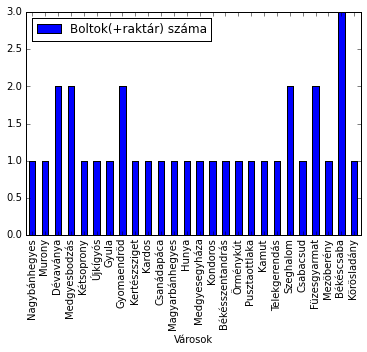

In [70]:
dictionary = dict(counts)
d = pd.DataFrame(dictionary.items())
d
d.columns = ['Városok', 'Boltok(+raktár) száma']
d.index=d["Városok"]
d.plot(kind='bar')

#CLUSTER:
## 2 dimenzió: telephely és a ccsop_id4 tagjai

In [71]:
tmp6.head(10)

,tph,datum,mennyiseg,cik_gyart,ccsop_id4
0,30302,2016-02-02,14,50136,3303
1,30313,2016-02-02,21,50136,3303
2,30316,2016-02-02,12,50136,3303
3,30318,2016-02-02,44,50136,3303
4,30319,2016-02-02,20,50136,3303
5,30323,2016-02-02,11,50136,3303
6,30324,2016-02-02,26,50136,3303
7,30325,2016-02-02,8,50136,3303
8,30327,2016-02-02,30,50136,3303
9,30329,2016-02-02,19,50136,3303


In [72]:
#tmp6.drop("datum",axis=1, inplace=True)
tmp6["datum_int"] = 0
tmp6.ix[tmp6.datum == "2016-02-02", 'datum_int'] = 1
tmp6.ix[tmp6.datum == "2016-02-03", 'datum_int'] = 2
tmp6.ix[tmp6.datum == "2016-02-04", 'datum_int'] = 3
tmp6.ix[tmp6.datum == "2016-02-05", 'datum_int'] = 4
tmp6.ix[tmp6.datum == "2016-02-06", 'datum_int'] = 5
tmp6.ix[tmp6.datum == "2016-02-07", 'datum_int'] = 6
#tmp6[tmp6["datum"]=="2016-02-03"] = 1
#tmp6[tmp6["datum"]=="2016-02-04"] = 2
#tmp6[tmp6["datum"]=="2016-02-05"] = 3
#tmp6[tmp6["datum"]=="2016-02-06"] = 4
#tmp6[tmp6["datum"]=="2016-02-07"] = 5
tmp6.head(30)

,tph,datum,mennyiseg,cik_gyart,ccsop_id4,datum_int
0,30302,2016-02-02,14,50136,3303,1
1,30313,2016-02-02,21,50136,3303,1
2,30316,2016-02-02,12,50136,3303,1
3,30318,2016-02-02,44,50136,3303,1
4,30319,2016-02-02,20,50136,3303,1
5,30323,2016-02-02,11,50136,3303,1
6,30324,2016-02-02,26,50136,3303,1
7,30325,2016-02-02,8,50136,3303,1
8,30327,2016-02-02,30,50136,3303,1
9,30329,2016-02-02,19,50136,3303,1


In [73]:
tmp6.drop("datum",axis=1, inplace=True)
tmp6.astype(int).head(30)

,tph,mennyiseg,cik_gyart,ccsop_id4,datum_int
0,30302,14,50136,3303,1
1,30313,21,50136,3303,1
2,30316,12,50136,3303,1
3,30318,44,50136,3303,1
4,30319,20,50136,3303,1
5,30323,11,50136,3303,1
6,30324,26,50136,3303,1
7,30325,8,50136,3303,1
8,30327,30,50136,3303,1
9,30329,19,50136,3303,1


In [74]:
from sklearn import preprocessing

x = tmp6.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

In [75]:
df = pd.DataFrame(x_scaled)
df.head(20)

,0,1,2,3,4
0,0.799197,0.067982,0.555745,0.344027,0
1,0.843373,0.068013,0.555745,0.344027,0
2,0.855422,0.067974,0.555745,0.344027,0
3,0.863454,0.068113,0.555745,0.344027,0
4,0.867470,0.068009,0.555745,0.344027,0
5,0.883534,0.067969,0.555745,0.344027,0
6,0.887550,0.068035,0.555745,0.344027,0
7,0.891566,0.067956,0.555745,0.344027,0
8,0.899598,0.068052,0.555745,0.344027,0
9,0.907631,0.068004,0.555745,0.344027,0


In [76]:
tmp6[tmp6["mennyiseg"]>0].head(20)

,tph,mennyiseg,cik_gyart,ccsop_id4,datum_int
0,30302,14,50136,3303,1
1,30313,21,50136,3303,1
2,30316,12,50136,3303,1
3,30318,44,50136,3303,1
4,30319,20,50136,3303,1
5,30323,11,50136,3303,1
6,30324,26,50136,3303,1
7,30325,8,50136,3303,1
8,30327,30,50136,3303,1
9,30329,19,50136,3303,1


In [77]:
tmp6_norm = (tmp6 - tmp6.mean()) / (tmp6.max() - tmp6.min())
#tmp6_norm.astype(int)
tmp6_norm.describe()

,tph,mennyiseg,cik_gyart,ccsop_id4,datum_int
count,9.623120e+05,9.623120e+05,9.623120e+05,9.623120e+05,9.623120e+05
mean,2.609754e-14,-1.702696e-19,-6.238458e-15,3.682096e-14,8.871113e-16
std,4.228977e-01,2.500538e-03,1.725150e-01,1.890829e-01,3.409234e-01
min,-4.222543e-01,-6.799806e-02,-5.162427e-01,-4.366404e-01,-5.004576e-01
25%,-3.941419e-01,-7.696721e-05,3.999025e-02,-8.178156e-02,-3.004576e-01
50%,-3.339009e-01,-5.510795e-05,4.907975e-02,-4.064002e-02,9.954235e-02
75%,4.612798e-01,-7.017578e-06,6.745827e-02,9.497086e-02,2.995424e-01
max,5.777457e-01,9.320019e-01,4.837573e-01,5.633596e-01,4.995424e-01


In [78]:
df = df.apply(lambda x: np.round(x,decimals=2))
df.describe()

,0,1,2,3,4
count,962312.000000,962312.000000,962312.000000,962312.000000,962312.000000
mean,0.421540,0.070010,0.515644,0.436835,0.500458
std,0.423226,0.002478,0.172273,0.189302,0.340923
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030000,0.070000,0.560000,0.350000,0.200000
50%,0.090000,0.070000,0.570000,0.400000,0.600000
75%,0.880000,0.070000,0.580000,0.530000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000


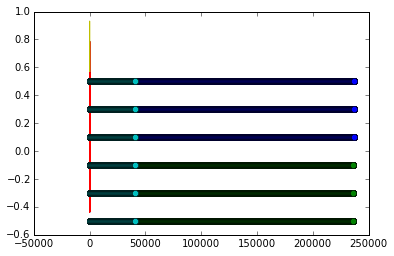

In [79]:
from sklearn.cluster import KMeans
m = KMeans(6)
tmp6_norm["cluster"] = m.fit_predict(tmp6_norm[["tph","mennyiseg","cik_gyart","ccsop_id4","datum_int"]].values)
for i in set(tmp6_norm["cluster"]):
    c = tmp6_norm[tmp6_norm["cluster"] == i]
    plt.plot(c["tph"], c["mennyiseg"], c["cik_gyart"], c["ccsop_id4"], c["datum_int"], 'o')
#plt.axis([0, 0, 1, 1]) #<- mettől meddig lássuk
plt.show()

In [80]:
tmp6_norm.head(30)

,tph,mennyiseg,cik_gyart,ccsop_id4,datum_int,cluster
0,0.376942,-0.000016,0.039503,-0.092614,-0.500458,1
1,0.421119,0.000015,0.039503,-0.092614,-0.500458,1
2,0.433167,-0.000025,0.039503,-0.092614,-0.500458,1
3,0.441199,0.000115,0.039503,-0.092614,-0.500458,1
4,0.445216,0.000010,0.039503,-0.092614,-0.500458,1
5,0.461280,-0.000029,0.039503,-0.092614,-0.500458,1
6,0.465296,0.000037,0.039503,-0.092614,-0.500458,1
7,0.469312,-0.000042,0.039503,-0.092614,-0.500458,1
8,0.477344,0.000054,0.039503,-0.092614,-0.500458,1
9,0.485376,0.000006,0.039503,-0.092614,-0.500458,1


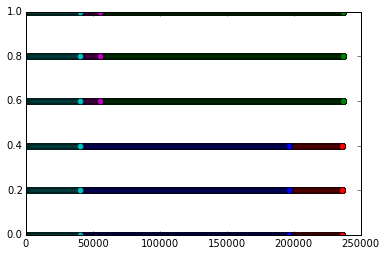

In [81]:
from sklearn.cluster import KMeans
m = KMeans(6)
df["cluster"] = m.fit_predict(df[[0,1,2,3,4]].values)
for i in set(df["cluster"]):
    c = df[df["cluster"] == i]
    plt.plot(c[0],c[1], c[2], c[3], c[4], 'o')
#plt.axis([0, 0, 1, 1]) #<- mettől meddig lássuk
plt.show()

In [82]:
df[df[0]>0]
df[df[1]>0]
df[df[2]>0]
df[df[3]>0]
df[df[4]>0]
df
df = (df - df.mean()) / (df.max() - df.min())
df.head(20)

,0,1,2,3,4,cluster
0,0.37846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
1,0.41846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
2,0.43846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
3,0.43846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
4,0.44846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
5,0.45846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
6,0.46846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
7,0.46846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
8,0.47846,-0.00001,0.044356,-0.096835,-0.500458,0.420551
9,0.48846,-0.00001,0.044356,-0.096835,-0.500458,0.420551


In [83]:
#df = tmp6_norm
df = (df - df.mean()) / (df.max() - df.min())
df = df.apply(lambda x: np.round(x,decimals=2))
df.describe()

,0,1,2,3,4,cluster
count,962312.000000,962312.000000,962312.000000,962312.000000,962312.000000,962312.000000
mean,0.001540,0.000010,-0.004356,-0.003165,0.000458,-0.000551
std,0.423226,0.002478,0.172273,0.189302,0.340923,0.311689
min,-0.420000,-0.070000,-0.520000,-0.440000,-0.500000,-0.380000
25%,-0.390000,0.000000,0.040000,-0.090000,-0.300000,-0.180000
50%,-0.330000,0.000000,0.050000,-0.040000,0.100000,0.020000
75%,0.460000,0.000000,0.060000,0.090000,0.300000,0.220000
max,0.580000,0.930000,0.480000,0.560000,0.500000,0.620000


In [84]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.cross_validation as xval
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score as auc_score

for t, v in xval.KFold(len(df), n_folds=5):
    tset = df.ix[t]
    vset = df.ix[v]
    m = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
    m.fit(tset.drop("cluster", axis=1), tset["cluster"])
    pred = m.predict(vset.drop("cluster", axis=1))
    prob = m.predict_proba(vset.drop("cluster", axis=1))[:,1]
    fpr, tpr, thresholds = roc(vset["cluster"], prob)
    plt.plot(fpr, tpr)
    plt.show()
    print("AUC: " + str(auc_score(vset["cluster"], prob)))

C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\sklearn\metrics\ranking.py:292: DeprecationWarning: elementwise comparison failed; this will raise the error in the future.
  not (np.all(classes == [0, 1]) or
C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\sklearn\metrics\ranking.py:293: DeprecationWarning: elementwise comparison failed; this will raise the error in the future.
  np.all(classes == [-1, 1]) or


ValueError: Data is not binary and pos_label is not specified

In [85]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.cross_validation as xval
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score as auc_score

for t, v in xval.KFold(len(tmp6_norm), n_folds=5):
    tset = tmp6_norm.ix[t]
    vset = tmp6_norm.ix[v]
    m = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
    m.fit(tset.drop("cluster", axis=1), tset["cluster"])
    pred = m.predict(vset.drop("cluster", axis=1))
    prob = m.predict_proba(vset.drop("cluster", axis=1))[:,1]
    fpr, tpr, thresholds = roc(vset["cluster"], prob)
    plt.plot(fpr, tpr)
    plt.show()
    print("AUC: " + str(auc_score(vset["cluster"], prob)))

C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\sklearn\metrics\ranking.py:292: DeprecationWarning: elementwise comparison failed; this will raise the error in the future.
  not (np.all(classes == [0, 1]) or
C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\sklearn\metrics\ranking.py:293: DeprecationWarning: elementwise comparison failed; this will raise the error in the future.
  np.all(classes == [-1, 1]) or


ValueError: Data is not binary and pos_label is not specified

In [86]:
valami = tmp6_norm[300:318]
valami.index = range(1,19)
valami.astype(int)
valami=valami.apply(lambda x: np.round(x,decimals=2))
valami.mennyiseg = 1
valami = pd.get_dummies(valami.cluster.values)
valami

,1,3,4
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [87]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.cross_validation as xval
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score as auc_score

for t, v in xval.KFold(len(valami), n_folds=3):
    tset = valami.ix[t]
    vset = valami.ix[v]
    m = DecisionTreeClassifier(max_depth=2, min_samples_split=2)
    m.fit(tset.drop("cluster", axis=1), tset["cluster"])
    pred = m.predict(vset.drop("cluster", axis=1))
    prob = m.predict_proba(vset.drop("cluster", axis=1))[:,1]
    fpr, tpr, thresholds = roc(vset["cluster"], prob)
    plt.plot(fpr, tpr)
    plt.show()
    print("AUC: " + str(auc_score(vset["cluster"], prob)))

ValueError: labels ['cluster'] not contained in axis

#Forgalom-rész!

In [88]:
forgalom.head(10)

,biz_nr,datum,mozgas,bolt,cikk,mennyiseg
0,SZB/330/000013,2016-02-02,142,30330,1015944,1
1,SZB/330/000013,2016-02-02,142,30330,1015958,10
2,SZB/330/000013,2016-02-02,142,30330,1015526,20
3,SZB/330/000013,2016-02-02,142,30330,1015541,50
4,SZB/330/000013,2016-02-02,142,30330,1019964,1
5,SZB/330/000013,2016-02-02,142,30330,1015700,3
6,SZB/330/000013,2016-02-02,142,30330,1015701,2
7,SZB/330/000259,2016-02-02,142,30330,1016782,12
8,SZB/318/000658,2016-02-02,142,30318,1016948,8
9,SZB/318/000658,2016-02-02,142,30318,1016627,6


In [89]:
forgalom.mennyiseg = forgalom.mennyiseg.apply(lambda x: np.round(x,decimals=-2))
forgalom.head(20)

,biz_nr,datum,mozgas,bolt,cikk,mennyiseg
0,SZB/330/000013,2016-02-02,142,30330,1015944,0
1,SZB/330/000013,2016-02-02,142,30330,1015958,0
2,SZB/330/000013,2016-02-02,142,30330,1015526,0
3,SZB/330/000013,2016-02-02,142,30330,1015541,0
4,SZB/330/000013,2016-02-02,142,30330,1019964,0
5,SZB/330/000013,2016-02-02,142,30330,1015700,0
6,SZB/330/000013,2016-02-02,142,30330,1015701,0
7,SZB/330/000259,2016-02-02,142,30330,1016782,0
8,SZB/318/000658,2016-02-02,142,30318,1016948,0
9,SZB/318/000658,2016-02-02,142,30318,1016627,0


In [90]:
forgalom.drop("biz_nr",axis=1,inplace=True)
forgalom.drop("mozgas",axis=1,inplace=True)


##Napi szintre alakítani a forgalom táblát! (össze kell adni az azonos napon, azonos cikkszámú, azonos boltban található termékek mennyiségét)

In [91]:
forgalom2 = pd.DataFrame(forgalom.groupby(["datum","bolt","cikk"]).mennyiseg.sum())
forgalom2.head(150)

mennyiseg
datum      bolt  cikk              
2016-02-02 10200 1002347        100
                 1002348        100
                 1002955        400
                 1002957        500
                 1002958        500
                 1002962        500
                 1002963        100
                 1002965       1400
                 1002970        400
                 1003253        200
                 1003377        600
                 1003378       2600
                 1003544        400
                 1003567        200
                 1004180       1700
                 1004203        100
                 1004206        100
                 1004209          0
                 1004210          0
                 1004211        100
                 1004212        100
                 1004213        100
                 1004214        100
                 1004822        500
                 1004823        600
                 1004825        300
                 1004826        500
                 1004832        600
                 1005052       -200
                 1005163        100
...                             ...
                 1010273        600
                 1010274        400
                 1010280        300
                 1010282        300
                 1010283        200
                 1010284        300
                 1010296        400
                 1010304        400
                 1010308        100
                 1010309        100
                 1010312        300
                 1010313        400
                 1010330        800
                 1010333        400
                 1010338        300
                 1010339        200
                 1010406        300
                 1010444       2500
                 1010738        400
                 1010741        400
                 1010748       1200
                 1010749        200
                 1010751        400
                 1010752        100
                 1010755        200
                 1010767       1400
                 1010768       1400
                 1010777        300
                 1010781        400
                 1010838        100

[150 rows x 1 columns]

## Van-e kiugró adat a forgalom között?

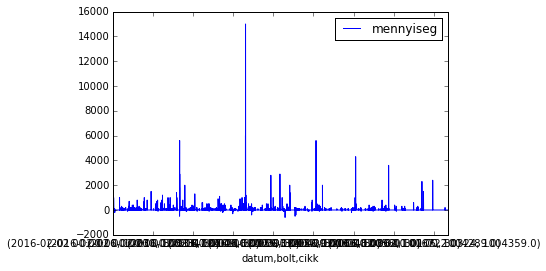

In [92]:
forgalom2.plot()

## Összehasonlítani egy termék forgalmát 2-3 boltra (diagram)!

## Keletkezik-e negatív forgalom? (Ha igen mit jelent, mi az oka?)

## Összehasonlítani a készletet és a forgalmat, van-e változás adott termék, adott boltban, adott időintervallumában a készlet változás és a forgalom között, ha van/ ha nincs megmagyarázni!!!!
#IDÁIG!

In [93]:
#cikk
#boltok
rendszer = pd.DataFrame(index=sorted(list(set(keszlet2.tph))),columns=sorted(list(set(keszlet2.cik))))
rendszer

,1000001,1000002,1000003,1000004,1000008,1000009,1000010,1000011,1000013,1000014,...,1021304,1021308,1021311,1021312,1021313,1021319,1021321,1021322,1021326,1021332
30103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
keszlet2
keszlet2.index = range(0,len(keszlet2))
keszlet2.head(10)

,cik,tph,datum,mennyiseg
0,1000002,30302,2016-02-02,14.00
1,1000008,30302,2016-02-02,4.00
2,1000011,30302,2016-02-02,7.00
3,1000013,30302,2016-02-02,12.00
4,1000019,30302,2016-02-02,1.00
5,1000020,30302,2016-02-02,13.00
6,1000024,30302,2016-02-02,5.00
7,1000035,30302,2016-02-02,-6.70
8,1000040,30302,2016-02-02,-0.35
9,1000044,30302,2016-02-02,5.02


Átírtam keszlet2-re, egyrészt hogy gyorsabban fusson le, másrészt hogy a kerekítettel számoljon.

In [96]:
a=0
keszletcik = keszlet2.cik.tolist() 
for i in keszletcik:
    rendszer[i][keszlet2.loc[[a]]["tph"]] = 1
    a+=1
rendszer
rendszer_copy = rendszer

#Csupa 1-esek(/0-sok) megkeresése

In [97]:
rendszer.fillna(0,inplace=True)
rendszer.head(10)

,1000001,1000002,1000003,1000004,1000008,1000009,1000010,1000011,1000013,1000014,...,1021304,1021308,1021311,1021312,1021313,1021319,1021321,1021322,1021326,1021332
30103,1,1,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
30104,1,1,1,1,0,0,1,1,1,0,...,1,1,1,1,1,1,0,1,1,0
30105,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30106,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30109,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30110,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
30111,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
30113,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30116,1,1,1,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_sum = pd.DataFrame(rendszer.sum(axis=0))
egyesek = df_sum[df_sum[0] == 30]
egyesek

,0
1000002,30
1000117,30
1000503,30
1000553,30
1000598,30
1000623,30
1000656,30
1000710,30
1000712,30
1000736,30


In [99]:
lista_sum = egyesek.index.values.tolist()
for i in lista_sum:
    rendszer.drop(i,axis=1,inplace=True)
    
rendszer.head(20)
#df_sum.count()

,1000001,1000003,1000004,1000008,1000009,1000010,1000011,1000013,1000014,1000015,...,1021304,1021308,1021311,1021312,1021313,1021319,1021321,1021322,1021326,1021332
30103,1,0,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
30104,1,1,1,0,0,1,1,1,0,1,...,1,1,1,1,1,1,0,1,1,0
30105,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30106,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30109,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30110,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
30111,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
30113,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30116,1,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Klaszter tph/frissáru

In [100]:
csop_desc = result3[result3["ccsop_desc2"]=="FRISSÁRU".decode("utf-8")]
csop_desc.head(20)

,cik_id,cik_desc2,cik_gyart,ccsop_desc,ccsop_desc2,ccsop_desc3,ccsop_desc4,gyarto_desc
0,1000001,Termék 0000001,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
1,1000002,Termék 0000002,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
2,1001142,Termék 0000899,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
3,1015407,Termék 0010280,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
4,1015408,Termék 0010281,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
5,1015412,Termék 0010284,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
6,1015413,Termék 0010285,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE",Gyártó 93
7,1001141,Termék 0000898,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
8,1001143,Termék 0000900,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93
9,1016785,Termék 0011471,50136,Alap cikkcsoport,FRISSÁRU,MIRELIT ÁRUK,ZÖLDSÉGEK,Gyártó 93


In [101]:
result_3 = result_2
result_2 = result_2[result_2["ccsop_desc2"]=="FRISSÁRU".decode("utf-8")]
result_2.head(20)

,cik,tph,datum,mennyiseg,ccsop_id4,cik_id,ccsop_id,ccsop_desc,ccsop_id2,ccsop_desc2,ccsop_id3,ccsop_desc3,ccsop_desc4
0,1000002,30302,2016-02-02,14,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
1,1000002,30313,2016-02-02,21,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
2,1000002,30316,2016-02-02,12,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
3,1000002,30318,2016-02-02,44,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
4,1000002,30319,2016-02-02,20,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
5,1000002,30323,2016-02-02,11,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
6,1000002,30324,2016-02-02,26,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
7,1000002,30325,2016-02-02,8,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
8,1000002,30327,2016-02-02,30,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"
9,1000002,30329,2016-02-02,19,3303,1000002,1,Alap cikkcsoport,30,FRISSÁRU,33,MIRELIT ÁRUK,"HALAK, TENGER GYÜMÖLCSE"


In [102]:
result_2.drop("datum",axis=1,inplace=True)
result_2.drop("ccsop_id4",axis=1,inplace=True)
result_2.drop("cik_id",axis=1,inplace=True)
result_2.drop("ccsop_id",axis=1,inplace=True)
result_2.drop("ccsop_id2",axis=1,inplace=True)
result_2.drop("ccsop_id3",axis=1,inplace=True)
result_2.drop("ccsop_desc3",axis=1,inplace=True)
result_2.drop("ccsop_desc2",axis=1,inplace=True)
result_2.drop("ccsop_desc",axis=1,inplace=True)
result_2.drop("ccsop_desc4",axis=1,inplace=True)

result_2

C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

,cik,tph,mennyiseg
0,1000002,30302,14
1,1000002,30313,21
2,1000002,30316,12
3,1000002,30318,44
4,1000002,30319,20
5,1000002,30323,11
6,1000002,30324,26
7,1000002,30325,8
8,1000002,30327,30
9,1000002,30329,19


In [103]:
result_2["mennyiseg"].max()

3392.0

In [104]:
result_2 = result_2[result_2["mennyiseg"] != 0]
result_2
hossz = len(result_2)
result_2.index = range(0,hossz)
result_2[result_2["cik"]==frissarucik[0]]

NameError: name 'frissarucik' is not defined

In [106]:
klaszter = pd.DataFrame(index=sorted(list(set(keszlet.tph))), columns=sorted(list(set(result_2.cik))))
klaszter.fillna(0,inplace=True)
klaszter

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021160,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273
30103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30108,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
frissarucik = result_2.cik.tolist()
a=0
for i in frissarucik:
    klaszter[i][result_2.loc[[a]]["tph"]] += result_2.loc[[a]]["mennyiseg"].max()
    a += 1    
klaszter

C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021160,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273
30103,32,126,0,16,0,0,0,-6,0,0,...,0,0,0,36,36,16.817,55,7.952,25,42.7100
30104,61,232,158,49,0,14,-18,-66,0,-54,...,15,14,16,0,0,0.000,0,0.000,0,0.0000
30105,53,122,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0,0.000,0,0.0000
30106,48,111,0,4,0,63,0,0,0,0,...,0,0,0,0,0,0.000,0,0.000,0,0.0000
30108,60,43,0,0,0,0,0,0,0,0,...,24,19,29,0,0,0.000,0,0.000,0,0.0000
30109,48,90,9,0,0,0,0,0,0,0,...,33,34,34,0,0,0.000,0,0.000,0,0.0000
30110,31,102,24,21,0,0,0,0,0,0,...,0,0,0,12,12,17.544,48,5.904,18,13.0080
30111,174,216,22,135,160,57,24,18,6,-6,...,0,0,0,69,62,0.000,48,8.044,48,13.5420
30113,66,144,48,0,156,0,0,0,0,0,...,0,0,0,0,0,0.000,0,0.000,0,0.0000
30116,72,108,6,11,0,0,-18,12,0,0,...,0,0,0,30,30,18.870,34,16.338,24,26.0660


In [108]:
result_2 = result_2[result_2["mennyiseg"] != 0]
result_2
hossz = len(result_2)
result_2.index = range(0,hossz)
result_2[result_2["cik"]==frissarucik[0]]

,cik,tph,mennyiseg
0,1000002,30302,14
1,1000002,30313,21
2,1000002,30316,12
3,1000002,30318,44
4,1000002,30319,20
5,1000002,30323,11
6,1000002,30324,26
7,1000002,30325,8
8,1000002,30327,30
9,1000002,30329,19


# %-olás + cluster

In [111]:
klaszter["sum"]=klaszter.sum(axis=1)
klaszter_copy=klaszter
klaszter

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273,sum
30103,32,126,0,16,0,0,0,-6,0,0,...,0,0,36,36,16.817,55,7.952,25,42.7100,65060.9860
30104,61,232,158,49,0,14,-18,-66,0,-54,...,14,16,0,0,0.000,0,0.000,0,0.0000,112518.8130
30105,53,122,12,0,0,0,0,0,0,0,...,0,0,0,0,0.000,0,0.000,0,0.0000,29935.1380
30106,48,111,0,4,0,63,0,0,0,0,...,0,0,0,0,0.000,0,0.000,0,0.0000,37199.6220
30108,60,43,0,0,0,0,0,0,0,0,...,19,29,0,0,0.000,0,0.000,0,0.0000,38935.4520
30109,48,90,9,0,0,0,0,0,0,0,...,34,34,0,0,0.000,0,0.000,0,0.0000,23258.4340
30110,31,102,24,21,0,0,0,0,0,0,...,0,0,12,12,17.544,48,5.904,18,13.0080,54462.3280
30111,174,216,22,135,160,57,24,18,6,-6,...,0,0,69,62,0.000,48,8.044,48,13.5420,79307.2990
30113,66,144,48,0,156,0,0,0,0,0,...,0,0,0,0,0.000,0,0.000,0,0.0000,64762.1900
30116,72,108,6,11,0,0,-18,12,0,0,...,0,0,30,30,18.870,34,16.338,24,26.0660,45811.4800


In [112]:
for i in klaszter.index.values.tolist():
    klaszter.loc[[i]] = klaszter.loc[[i]]/klaszter.loc[[i]]["sum"].max()
klaszter

,1000001,1000002,1000003,1000004,1000009,1000010,1000011,1000013,1000014,1000015,...,1021161,1021163,1021258,1021260,1021261,1021264,1021269,1021272,1021273,sum
30103,0.000492,0.001937,0.000000,0.000246,0.000000,0.000000,0.000000,-0.000092,0.000000,0.000000,...,0.000000,0.000000,0.000553,0.000553,0.000258,0.000845,0.000122,0.000384,0.000656,1
30104,0.000542,0.002062,0.001404,0.000435,0.000000,0.000124,-0.000160,-0.000587,0.000000,-0.000480,...,0.000124,0.000142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
30105,0.001770,0.004075,0.000401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
30106,0.001290,0.002984,0.000000,0.000108,0.000000,0.001694,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
30108,0.001541,0.001104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000488,0.000745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
30109,0.002064,0.003870,0.000387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001462,0.001462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
30110,0.000569,0.001873,0.000441,0.000386,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000220,0.000220,0.000322,0.000881,0.000108,0.000331,0.000239,1
30111,0.002194,0.002724,0.000277,0.001702,0.002017,0.000719,0.000303,0.000227,0.000076,-0.000076,...,0.000000,0.000000,0.000870,0.000782,0.000000,0.000605,0.000101,0.000605,0.000171,1
30113,0.001019,0.002224,0.000741,0.000000,0.002409,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
30116,0.001572,0.002357,0.000131,0.000240,0.000000,0.000000,-0.000393,0.000262,0.000000,0.000000,...,0.000000,0.000000,0.000655,0.000655,0.000412,0.000742,0.000357,0.000524,0.000569,1


In [113]:
klaszter.drop("sum",axis=1,inplace=True)

C:\Users\heloszia\Documents\ONLAB\New folder\lib\site-packages\IPython\kernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


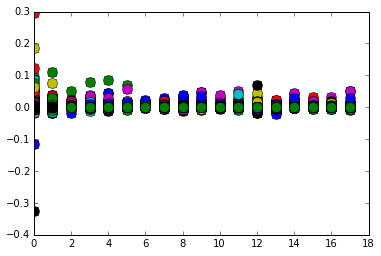

In [114]:
#klaszter.drop("cluster",axis=1,inplace=True)
from sklearn.cluster import KMeans
m = KMeans(7)
klaszter["cluster"] = m.fit_predict(klaszter.values)
for i in set(klaszter["cluster"]):
    c = klaszter[klaszter["cluster"] == i]
    c.drop("cluster",axis=1,inplace=True)
    plt.plot(c.values, 'o', markersize= 10)
#plt.axis([-0.01, 0.01, -0.031, 0.05])
plt.show()

In [115]:
klaszter["cluster"]

30103    0
30104    4
30105    4
30106    4
30108    3
30109    6
30110    0
30111    4
30113    4
30116    4
30121    4
30122    2
30123    6
30124    4
30125    0
30126    0
30302    4
30313    0
30316    0
30318    4
30319    4
30322    4
30323    4
30324    4
30325    4
30327    5
30328    1
30329    4
30330    4
30352    4
Name: cluster, dtype: int32

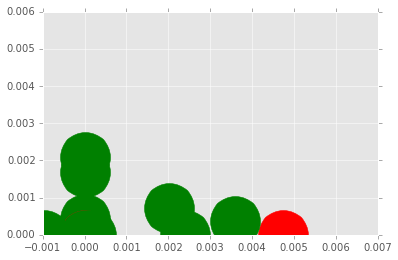

In [116]:
from matplotlib.pyplot import style
style.use("ggplot")
from sklearn.cluster import KMeans

X = klaszter.as_matrix()
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

colors = ["g.","r."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], X[i][2], X[i][3], X[i][4], X[i][5],
             colors[labels[i]], markersize = 100 )


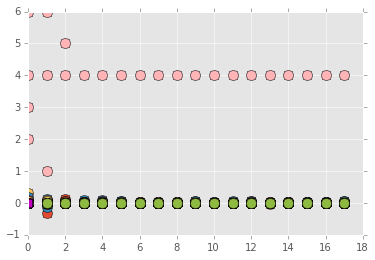

In [117]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

data = klaszter.as_matrix()

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,:],'o',
     data[idx==1,:],'o',
     data[idx==2,:],'o',
     data[idx==3,:],'o',
     data[idx==4,:],'o',markersize=10) # third cluster points
plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
show()

In [118]:
len(data[0])

1617

In [119]:
klaszter.to_csv("klaszter.csv", sep='\t', encoding='utf-8')

In [120]:
klaszter
klaszter_coopy = klaszter
klaszter_coopy.drop("cluster",axis=1,inplace=True)

In [121]:
type(c)

pandas.core.frame.DataFrame

#Klaszter tph/ccsop_id2

In [122]:
csop_desc2 = sorted(list(set(result_3.ccsop_desc2.tolist())))
csoportok = pd.DataFrame(index=sorted(list(set(result_3.tph))), columns=csop_desc2)
csoportok

,EGYÉB CIKKEK,FRISSÁRU,HÚS,HÚSKÉSZTMÉNYEK,ITALOK,NON FOOD TERMÉKEK,"PAPÍR, VEGYIÁRU",SZOLGÁLTATÁSOK,"ZÖLDSÉG, GYÜMÖLCS",ÉLELMISZER
30103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
result_3.head(50)

,cik,tph,mennyiseg,ccsop_desc2
0,1000002,30302,14,FRISSÁRU
1,1000002,30313,21,FRISSÁRU
2,1000002,30316,12,FRISSÁRU
3,1000002,30318,44,FRISSÁRU
4,1000002,30319,20,FRISSÁRU
5,1000002,30323,11,FRISSÁRU
6,1000002,30324,26,FRISSÁRU
7,1000002,30325,8,FRISSÁRU
8,1000002,30327,30,FRISSÁRU
9,1000002,30329,19,FRISSÁRU


In [124]:
result_3.drop("datum",axis=1,inplace=True)
result_3.drop("ccsop_id4",axis=1,inplace=True)
result_3.drop("cik_id",axis=1,inplace=True)
result_3.drop("ccsop_id",axis=1,inplace=True)
result_3.drop("ccsop_desc",axis=1,inplace=True)
result_3.drop("ccsop_id2",axis=1,inplace=True)
result_3.drop("ccsop_id3",axis=1,inplace=True)
result_3.drop("ccsop_desc3",axis=1,inplace=True)
result_3.drop("ccsop_desc4",axis=1,inplace=True)
result_3.head(100)

ValueError: labels ['datum'] not contained in axis

In [125]:
result_3 = result_3[result_3["mennyiseg"] != 0]

In [126]:
result_3
result_3.index = range(0,len(result_3))
result_3.head(10)

,cik,tph,mennyiseg,ccsop_desc2
0,1000002,30302,14,FRISSÁRU
1,1000002,30313,21,FRISSÁRU
2,1000002,30316,12,FRISSÁRU
3,1000002,30318,44,FRISSÁRU
4,1000002,30319,20,FRISSÁRU
5,1000002,30323,11,FRISSÁRU
6,1000002,30324,26,FRISSÁRU
7,1000002,30325,8,FRISSÁRU
8,1000002,30327,30,FRISSÁRU
9,1000002,30329,19,FRISSÁRU


In [ ]:
listacsop = result_3.ccsop_desc2.tolist()
a=0
csoportok.fillna(0,inplace=True)
for i in listacsop:
    csoportok[i][result_3.loc[[a]]["tph"]] += result_3.loc[[a]]["mennyiseg"].max()
    a += 1
csoportok

In [ ]:
csoportok["sum"]=csoportok.sum(axis=1)
#klaszter_copy=klaszter
#klaszter

In [ ]:
for i in csoportok.index.values.tolist():
    csoportok.loc[[i]] = csoportok.loc[[i]]/csoportok.loc[[i]]["sum"].max()
csoportok.drop("sum",axis=1,inplace=True)
csoportok

In [ ]:
csoportok.columns = [1,2,3,4,5,6,7,8,9,10]
csoportok

In [ ]:
from sklearn.cluster import KMeans
m = KMeans(4)
csoportok["cluster"] = m.fit_predict(csoportok[[1,2,3,4,5,6,7,8,9,10]].values)
for i in set(csoportok["cluster"]):
    c = csoportok[csoportok["cluster"] == i]
    plt.plot(c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], 'o', markersize=12)
#plt.axis([-0.001, 0.15, -0.001, 0.15])
plt.show()

In [ ]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# data generation
data = csoportok.as_matrix()

# computing K-Means with K = 2 (2 clusters)
centroids,_ = kmeans(data,2)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],data[idx==0,2],data[idx==0,3],data[idx==0,4],data[idx==0,5],data[idx==0,6],data[idx==0,7],data[idx==0,8],data[idx==0,9],'ob',
     data[idx==1,0],data[idx==1,1],data[idx==1,2],data[idx==1,3],data[idx==1,4],data[idx==1,5],data[idx==1,6],data[idx==1,7],data[idx==1,8],data[idx==1,9],'or')
#plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [ ]:
csoportok

# KNN a  rendszer táblától

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
nbrs = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(rendszer)
distances, indices = nbrs.kneighbors(rendszer)
distances

In [ ]:
indices

## A boltok elhelyezkedése

In [ ]:
nbrs.kneighbors_graph(rendszer).toarray()

## A legegyedibb bolt
##1. 5 átlaga alapján, 2. a legtávolabbi nn-alapján

In [ ]:
maxd=0
wstore=0
for i in range(len(distances[:,1])):
    sum=0
    for j in range(len(distances[1,:])):
        sum+=distances[i][j]
    sum/=distances.shape[1]
    if(maxd<sum):
        maxd=sum
        wstore=i
print(wstore)

In [ ]:
print(rendszer[wstore:wstore+1].index.values)

In [ ]:
maxd2=0
wstore2=0
for i in range(len(distances[:,1])):
        if (distances[i][1] > maxd2):
            maxd2=distances[i][1]
            wstore2=i
print(maxd2)